In [1]:
import qutip as qt
import matplotlib.pyplot as plt
import h5py
import numpy as np
from data_gen import read_data, random_func, gaussian_envelope, dset_size

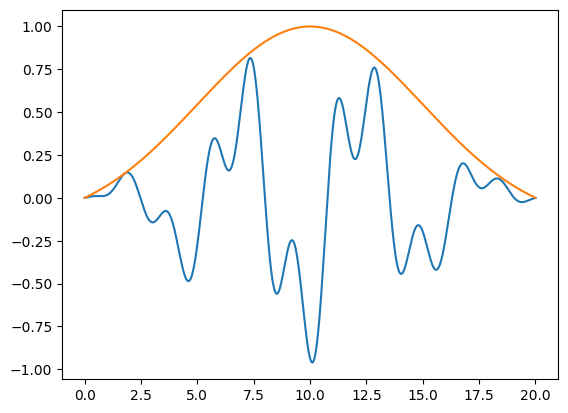

In [9]:
t_end = 20
dt = 0.01
tlist = np.arange(0, t_end+dt, dt)
plt.plot(tlist, random_func(tlist, 5)(tlist))
plt.plot(tlist, gaussian_envelope(tlist, tlist[-1]))


In [53]:
i = 2
states, H = read_data("data.hdf5", 2, "train", i, i+1)
H0 = H[0,0]
psi0 = states[0,0]
psi0, H0, H[0, 9], H.shape


(array([0.63784903-0.20241323j, 0.24196739-0.7025876j ]),
 array([[-0.07609873+0.j,  0.        +0.j],
        [ 0.        +0.j, -0.10506675+0.j]]),
 array([[-0.07609873+0.j        ,  0.0051182 -0.00515437j],
        [ 0.0051182 +0.00515437j, -0.10278315+0.j        ]]),
 (1, 101, 2, 2))

In [73]:
import scipy as sp
def Ham(t, tlist):
    tdiff = np.abs(t-tlist)
    return qt.Qobj(H[0, min(np.argmin(tdiff), H.shape[1]-1)])

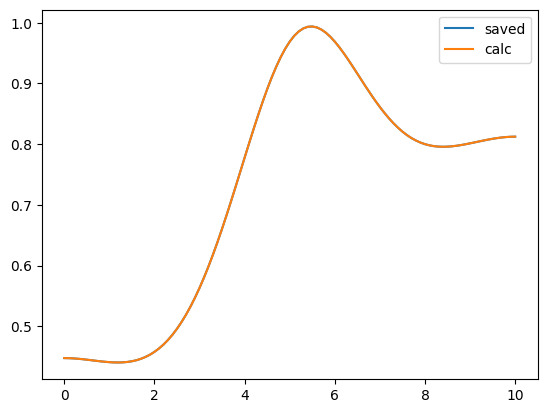

In [74]:
prob0 = np.abs(states[0,:,0])**2
t_end=10
dt = 0.1
t_list = np.arange(0, t_end+dt, dt)
states_calc = qt.sesolve(lambda t, args: Ham(t, t_list), qt.Qobj(psi0), tlist=np.arange(0, t_end+dt, dt))
prob0_calc = [np.abs(s[0][0][0])**2 for s in states_calc.states]
plt.plot(t_list, prob0, label="saved")
plt.plot(t_list, prob0_calc, label="calc")
plt.legend()